<ipython-input-3-61fd6edca304>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_data['date'] = pd.to_datetime(india_data['date'])


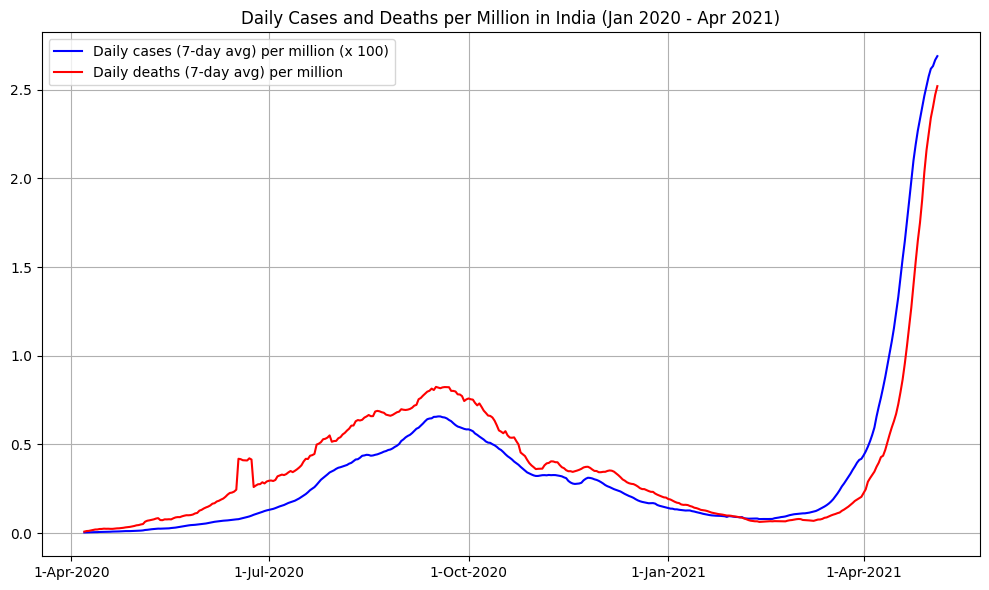

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
from datetime import datetime

# Assume 'df' is your DataFrame containing the provided columns
df = pd.read_csv('owid-covid-data.csv')
df = pd.DataFrame(df)

# Filter data for India
india_data = df[df['location'] == 'India']

# Filter data for the date range January 2020 to April 2021
india_data['date'] = pd.to_datetime(india_data['date'])
india_data = india_data[(india_data['date'] >= '2020-04-01') & (india_data['date'] <= '2021-05-05')]
# Calculate 7-day moving averages for new_cases_per_million and new_deaths_per_million
india_data = india_data.sort_values('date')
india_data['new_cases_per_million_7day_avg'] = india_data['new_cases_per_million'].rolling(7).mean()
india_data['new_deaths_per_million_7day_avg'] = india_data['new_deaths_per_million'].rolling(7).mean()

# Plotting
plt.figure(figsize=(10, 6))

# Daily cases (7-day avg) per million x 100
plt.plot(india_data['date'], india_data['new_cases_per_million_7day_avg']/100,
         label='Daily cases (7-day avg) per million (x 100)', color='blue')

# Daily deaths (7-day avg) per million
plt.plot(india_data['date'], india_data['new_deaths_per_million_7day_avg']/1,
         label='Daily deaths (7-day avg) per million', color='red')

plt.title('Daily Cases and Deaths per Million in India (Jan 2020 - Apr 2021)')
plt.legend()
myfmt=mdates.DateFormatter("1-%b-20%y")
plt.gca().xaxis.set_major_formatter(myfmt)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
plt.grid(True)
plt.tight_layout()
plt.show()
